# Random Walk Generation

$$ \frac{S_{t+dt}-S_{t}}{S_{t}} = {\mu}dt + {\sigma}{\sqrt[]{dt}}{\xi}_t $$

In [8]:
import numpy as np
import pandas as pd
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    ...
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [2]:
p = gbm(10, n_scenarios=3)

In [3]:
p

,0,1,2
0,98.796752,97.315128,103.611293
1,99.050020,94.106179,102.642612
2,104.080759,96.138268,105.635380
3,100.919073,94.102220,100.729626
4,99.386379,90.353252,101.361380
...,...,...,...
115,124.140872,382.343383,153.617747
116,128.143725,392.385334,148.047176
117,112.391302,368.080394,147.140877
118,118.313460,354.893515,151.864687


<AxesSubplot:>

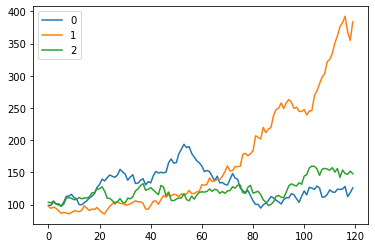

In [4]:
p.plot()

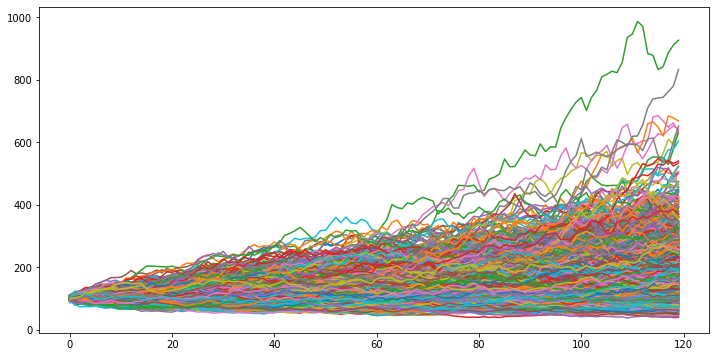

In [5]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6),legend=False)

In [12]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    ...
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1= np.random.normal(loc=1+mu*dt, scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [10]:
%timeit gbm0(n_years=5,n_scenarios=1000)

3.96 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%timeit gbm(n_years=5,n_scenarios=1000)

3.06 ms ± 82.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:>

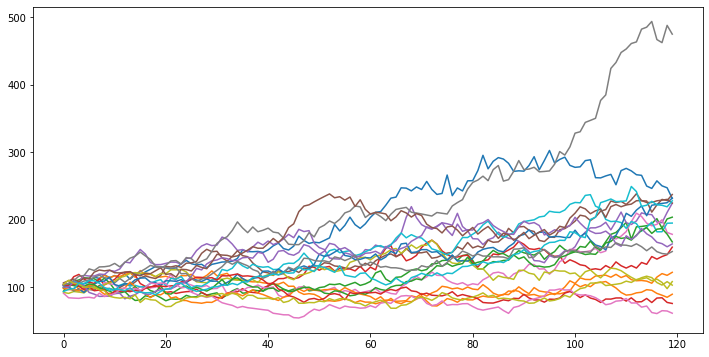

In [16]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [20]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    ...
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1= np.random.normal(loc=1+mu*dt, scale=(sigma*np.sqrt(dt)),size=(n_steps+1, n_scenarios))
    rets_plus_1[0] = 1
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

(0.0, 126.0, 26.68988873993111, 353.9739628126906)

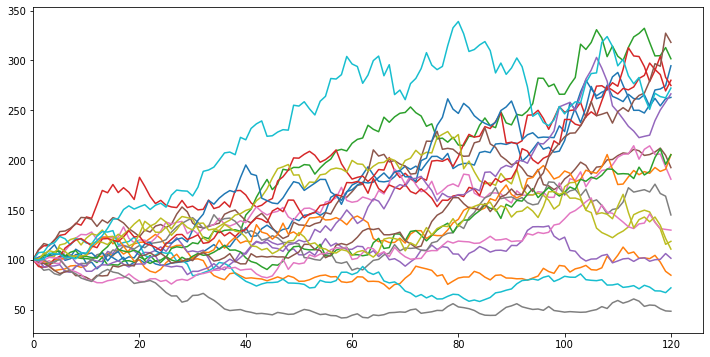

In [23]:
plt = gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))
plt.axis(xmin=0)